In [8]:
#Date: 06/04/2021
#Location: Imaging Mind Architecture Lab, Trinity College Dublin

# Loading all the libraries

import pandas as pd
from scipy import stats
import seaborn as sns
import pandas as pd

In [9]:
# Loading the data

asd = pd.read_csv('C:\\Users\\theab\\OneDrive\\Documents\\Trinity Dublin\\MSc Neuroscience\\Courses\\PRJ - final\\Project\\WHMSTS\\Code and Results\\Files\\ASD\\ASD_ISC.csv')
non_asd = pd.read_csv('C:\\Users\\theab\\OneDrive\\Documents\\Trinity Dublin\\MSc Neuroscience\\Courses\\PRJ - final\\Project\\WHMSTS\\Code and Results\\Files\\Non_ASD\\Non_ASD_ISC.csv')


In [10]:
# Running 2 sample t-test

print ('Null Hypothesis: ASD and non-ASD cohorts have similar brain synchronisation')

t_value, p_value = stats.ttest_ind(asd['ISC'], non_asd['ISC'])

print('Test statistic is', t_value)

print('p-value for two tailed test is', p_value)

alpha = 0.05

if p_value <= alpha:

    print ('Null hypothesis is rejected, hence ASD group != Non-ASD group')

else:

    print ('Null hypothesis is retained, hence ASD group = Non-ASD group')

Null Hypothesis: ASD and non-ASD cohorts have similar brain synchronisation
Test statistic is -6.157911905859653
p-value for two tailed test is 4.641236879533839e-09
Null hypothesis is rejected, hence ASD group != Non-ASD group


Text(0, 0.5, 'ISC Values')

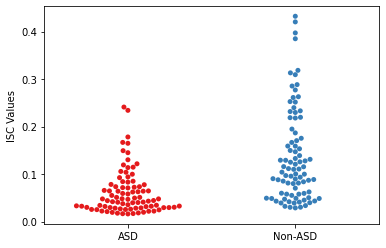

In [11]:
# Swarm plot for ISC values

data = pd.DataFrame([])
data['ASD'] = asd['ISC']
data['Non-ASD'] = non_asd['ISC']

# Plotting ASD and Non-ASD values
plot = sns.swarmplot(data=data, palette='Set1')
plot.set_ylabel('ISC Values')

In [12]:
# Building dictionary for regions in each network

# Initialising zip list
asd_rois = list(zip(asd['Network'], asd['ROI']))
non_asd_rois = list(zip(non_asd['Network'], non_asd['ROI']))

# Initiating empty dictionary
asd_tab = {}
non_asd_tab = {}

# Creating blank entries
for a,b in asd_rois:
    asd_tab[a] = []
    non_asd_tab[a] = []

# Appending values in respective dictionaries
for m, n in asd_rois:
    asd_tab[m].append(n)
# Sorting the dictionary
asd_tab = sorted(asd_tab.items())
for c, d in non_asd_rois:
    non_asd_tab[c].append(d)
# Sorting the dictionary
non_asd_tab = sorted(non_asd_tab.items())

# Initiating the dataframe
asd_data = pd.DataFrame(asd_tab)
non_asd_data = pd.DataFrame(non_asd_tab)

# Output dataframe
rois = pd.DataFrame()
rois['Networks'] = asd_data[0]
rois['ROIs in ASD Cohort'] = asd_data[1]
rois['ROIS in Non-ASD Cohort'] = non_asd_data[1]

In [13]:
# Exporting dataframe into csv

rois.to_csv('C:\\Users\\theab\\OneDrive\\Documents\\Trinity Dublin\\MSc Neuroscience\\Courses\\PRJ - final\\Project\\WHMSTS\\Code and Results\\Files\\Common\\ROI Table.csv', index=False)